سوال 1:  
سیستم خطی با پاسخ ضربه‌ای

h(t) = e^{-2t}u(t)

را در نظر بگیرید.  
1. نمودار پاسخ ضربه‌ای را رسم کنید.  
2. بررسی کنید که آیا این سیستم پایدار است یا خیر.


Integral of |h(t)|: 0.49999999941562867
System is BIBO stable? True


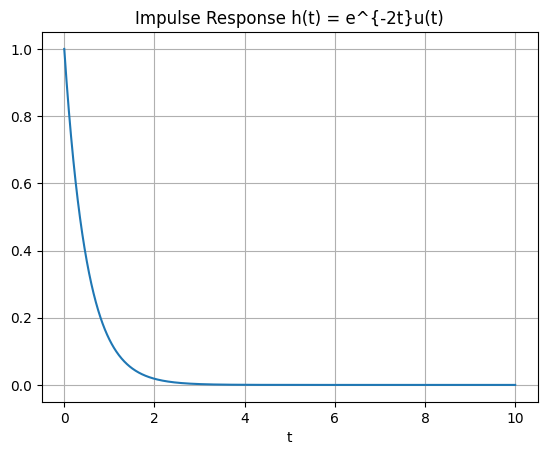

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
t = np.linspace(0, 10, 1000)
h = np.exp(-2 * t)
energy = simpson(np.abs(h), t)
print("Integral of |h(t)|:", energy)
print("System is BIBO stable?", energy < np.inf)
plt.plot(t, h)
plt.title("Impulse Response h(t) = e^{-2t}u(t)")
plt.xlabel("t")
plt.grid(True)
plt.show()


سوال 2:  
دو سیگنال

x₁(t) = u(t) و x₂(t) = e^{-t}u(t)

را با هم مقایسه کنید.  
1. نمودار هر دو را در بازه [0, 10] رسم کنید.  
2. انرژی هر سیگنال را محاسبه کنید.


Energy x1(t): 10.0
Energy x2(t): 0.4999999994156286


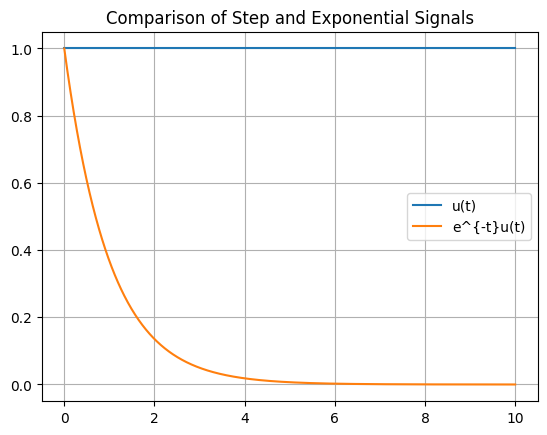

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
t = np.linspace(0, 10, 1000)
x1 = np.ones_like(t)
x2 = np.exp(-t)

from scipy.integrate import simpson
e1 = simpson(x1**2, t)
e2 = simpson(x2**2, t)

print("Energy x1(t):", e1)
print("Energy x2(t):", e2)

plt.plot(t, x1, label="u(t)")
plt.plot(t, x2, label="e^{-t}u(t)")
plt.legend()
plt.title("Comparison of Step and Exponential Signals")
plt.grid(True)
plt.show()


سوال 3:  
برای سیگنال

x(t) = rect(t),

حاصل ضرب آن با

e^{-t²}

را در حوزه فرکانس بررسی کنید  
1. سیگنال ضرب شده را تعریف کن و رسم کنید  
2. تبدیل فوریه آن را محاسبه و دامنه‌اش را رسم کنید


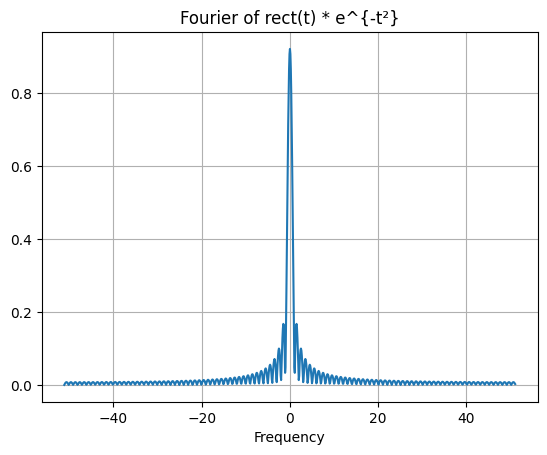

In [4]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
t = np.linspace(-5, 5, 1024)
dt = t[1] - t[0]
x = np.where(np.abs(t) <= 0.5, 1, 0)
w = np.exp(-t**2)
product = x * w

from scipy.fft import fft, fftshift, fftfreq
X = fftshift(fft(product)) * dt
f = fftshift(fftfreq(len(t), dt))

plt.plot(f, np.abs(X))
plt.title("Fourier of rect(t) * e^{-t²}")
plt.xlabel("Frequency")
plt.grid(True)
plt.show()


سوال 4:  
سیگنال

x(t) = cos(2πt) + 0.5cos(6πt)

 را رسم کرده و طیف آن را بررسی کنید  
1. دامنه طیف فوریه را رسم کنید


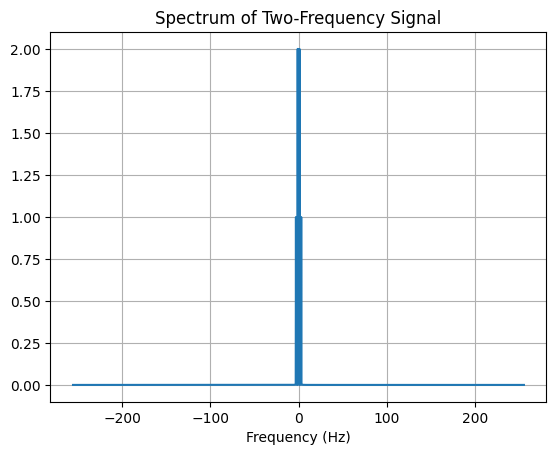

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
t = np.linspace(-2, 2, 2048)
dt = t[1] - t[0]
x = np.cos(2*np.pi*t) + 0.5*np.cos(6*np.pi*t)

X = fftshift(fft(x)) * dt
f = fftshift(fftfreq(len(t), dt))

plt.plot(f, np.abs(X))
plt.title("Spectrum of Two-Frequency Signal")
plt.xlabel("Frequency (Hz)")
plt.grid(True)
plt.show()


سوال 5:  
سیگنال

x(t) = cos(8πt) را با نرخ fs = 10 Hz

 نمونه‌برداری کن.  
1. سیگنال گسسته‌شده را رسم کنید
2. آیا آلیاسینگ رخ می‌دهد؟ دلیل را توضیح بدهید


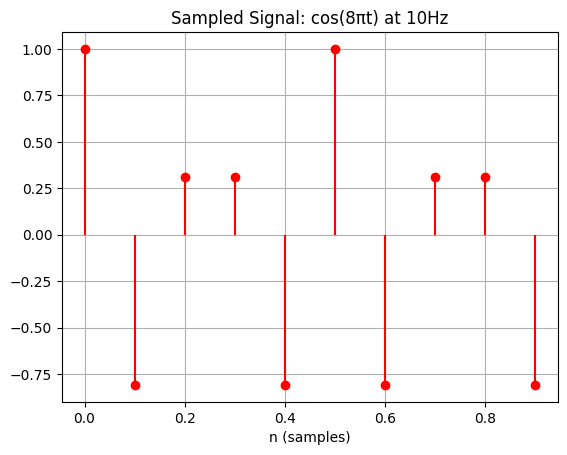

In [6]:
fs = 10
n = np.arange(0, 1, 1/fs)
x_n = np.cos(8 * np.pi * n)

plt.stem(n, x_n, basefmt=" ", linefmt="r", markerfmt="ro")
plt.title("Sampled Signal: cos(8πt) at 10Hz")
plt.xlabel("n (samples)")
plt.grid(True)
plt.show()


سوال 6:  
سیگنال

x(t) = t·sinc(t)

را در نظر بگیر.  
1. نمودار سیگنال را رسم کنید
2. بررسی کنید که آیا انرژی آن متناهی است یا خیر


Energy of t·sinc(t): 0.20264236728476928


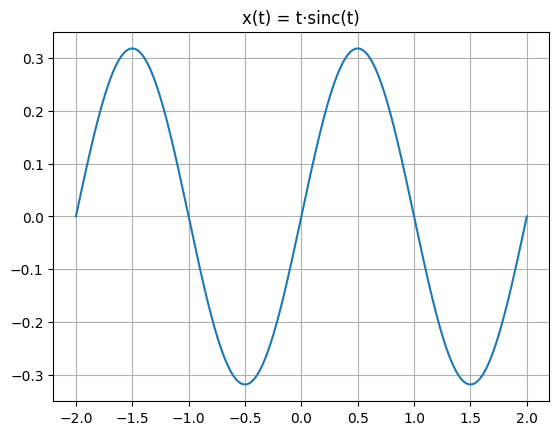

In [7]:
x = t * np.sinc(t)
energy = simpson(x**2, t)
print("Energy of t·sinc(t):", energy)

plt.plot(t, x)
plt.title("x(t) = t·sinc(t)")
plt.grid(True)
plt.show()


سوال 7:  
سیگنال مثلثی

x(t) = 1 - |t| برای |t| <= 1

 را رسم و به بخش زوج و فرد تجزیه کنید


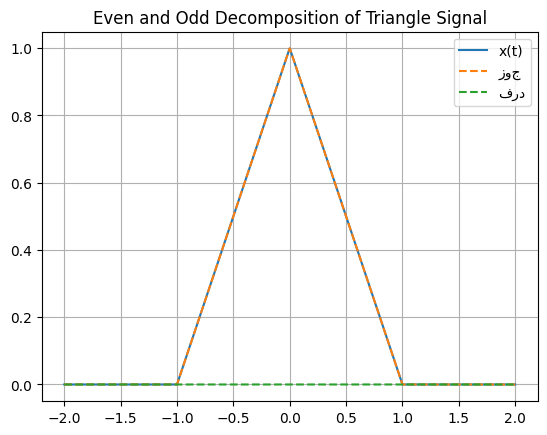

In [8]:
x = np.maximum(0, 1 - np.abs(t))
x_even = (x + x[::-1]) / 2
x_odd = (x - x[::-1]) / 2

plt.plot(t, x, label="x(t)")
plt.plot(t, x_even, '--', label="زوج")
plt.plot(t, x_odd, '--', label="فرد")
plt.legend()
plt.grid(True)
plt.title("Even and Odd Decomposition of Triangle Signal")
plt.show()


سوال 8:  
سیگنال

x(t) = sinc(t) و x(t - 2)

را مقایسه کنید  
1. طیف فوریه هر دو را رسم کنید
2. تفاوت در فاز را توضیح بدهید


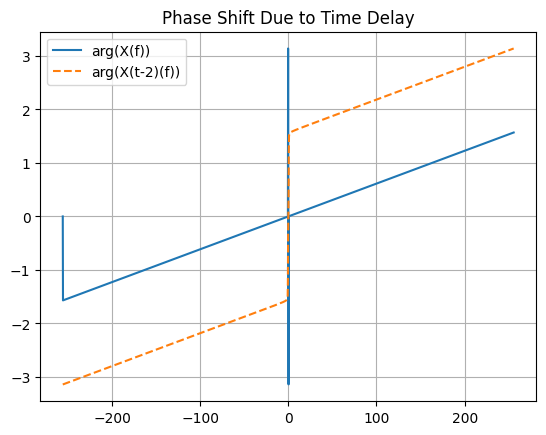

In [9]:
x = np.sinc(t)
x_delayed = np.sinc(t - 2)

X = fftshift(fft(x)) * dt
X_d = fftshift(fft(x_delayed)) * dt

plt.plot(f, np.angle(X), label="arg(X(f))")
plt.plot(f, np.angle(X_d), '--', label="arg(X(t-2)(f))")
plt.legend()
plt.title("Phase Shift Due to Time Delay")
plt.grid(True)
plt.show()


سوال 9:  
سیگنال

x(t) = sin(20πt) + sin(60πt)

را از یک فیلتر میان‌گذر عبور بدهید  
1. از تبدیل فوریه استفاده کنید و فقط باند

 20–40Hz

  را نگه دارید


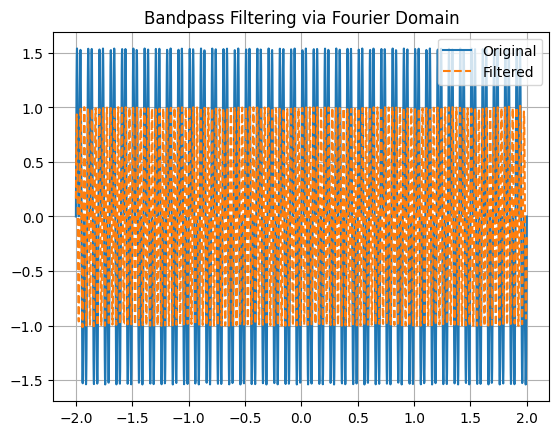

In [11]:
x = np.sin(20 * np.pi * t) + np.sin(60 * np.pi * t)
X = fftshift(fft(x)) * dt

band = (np.abs(f) >= 20) & (np.abs(f) <= 40)
X_filtered = np.where(band, X, 0)
x_filtered = np.real(np.fft.ifft(np.fft.ifftshift(X_filtered))) / dt

plt.plot(t, x, label="Original")
plt.plot(t, x_filtered, '--', label="Filtered")
plt.legend()
plt.title("Bandpass Filtering via Fourier Domain")
plt.grid(True)
plt.show()


سوال 10:  
سیگنال x(t) = sin(2πt)

را در نظر بگیر.  
1. فاز طیف را صفر کن و دوباره سیگنال را بازسازی کنید
2. نتیجه را با سیگنال اصلی مقایسه کنید


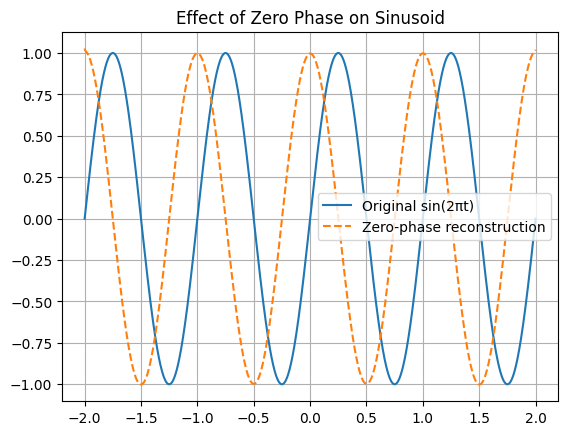

In [12]:
x = np.sin(2 * np.pi * t)
X = fftshift(fft(x)) * dt
X_nophase = np.abs(X)

x_recon = np.real(np.fft.ifft(np.fft.ifftshift(X_nophase))) / dt

plt.plot(t, x, label="Original sin(2πt)")
plt.plot(t, x_recon, '--', label="Zero-phase reconstruction")
plt.legend()
plt.title("Effect of Zero Phase on Sinusoid")
plt.grid(True)
plt.show()
